# Understanding Bitcoin with ML   
---
### Agenda
**1. Why is Bitcoin Valuable**   
**2. Fundamental Data Collection**  
**3. Feature Analysis**    
**4. Shapley Analysis**
____

**Bitcoin Summary**   
Bitcoin is P2P electronic money that is valuable over legacy systems because of the monetary autonomy it brings to its users. Bitcoin seeks to address the root problem with conventional currency: all the trust that's required to make it work -- Not that justified trust is a bad thing, but trust makes systems brittle, opaque, and costly to operate. Trust failures result in systemic collapses, trust curation creates inequality and monopoly lock-in, and naturally arising trust choke-points can be abused to deny access to due process. Through the use of cryptographic proof, decentralized networks and open source software Bitcoin minimizes and replaces these trust costs.

Story 1: Venezuela
Story 2: Zimbambwe

What are the Primary Functions of Money?   
1. Medium of Exchange  
2. Store of Value

Bitcoin as Medium of Exchange. Transactions are:   
1. Permissionless & Borderless   
2. Anonymous  
3. Private   
4. Censorship Resistant   
5. Fast   
6. Cheap   
7. Irreversible   
8. Online and avalable 24/7 365   

Bitcoin as a Store of Value 
1. Cannot be printed or debased. **Only 21 million bitcoins will ever exist**     
2. No storage costs. Bitcoin is completely Digital and takes no physical space regardless of ammount  
3. Are easy to Protect & Hide. Can be stored on a phone, computer, encrypted on a paper back up or memorized in your head.
4. No counterparty Risk. If you keep the private key of a bitcoin secret and the transaction has enough confirmations(6 blocks deep), then nobody can take them from you no matter for what reason, no matter how good the excuse, no matter what.  


**Step 1: Data Collection**   
Source: Blockchain.info   
Fundamental Features:   
    1. 
    2. 
    3. 
    4. 
    5. 
    6. 
    7. 
    8. 

In [12]:
timespan = '120months'
rollingAverage = '1hour'
start = '2012-04-00'
sampled = 'false'

global totalled_df
global url
url = 'https://api.blockchain.info/charts/'
def create_df(url, chartName):
    url += chartName
    params = dict(
        timespan = timespan,
        rollingAverage = rollingAverage,
        start = start, 
        sampled = sampled,
    )
    resp = requests.get(url=url, params=params)
    data = json.loads(resp.text)
#     print(json.dumps(data, indent=4, sort_keys=True))
    data = data['values']
    df = pd.DataFrame(data)
    df.set_index('x', inplace=True)
    df.columns =[chartName]
    return df

import json, requests
import pandas as pd

#1 BTC MARKET PRICE
df = create_df(url, 'market-price')
df.reset_index(inplace=True)

totalled_df = df
#2 TRADE VOLUME
df = create_df(url, 'trade-volume')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
#3 MEDIAN TRANSACTION TIME
df = create_df(url, 'median-confirmation-time')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
#4 HASH RATE
df = create_df(url, 'hash-rate')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
#5 TOTAL TRANSACTION FEES
df = create_df(url, 'transaction-fees-usd')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
#6 NUMBER OF UNIQUE ADDRESSES
df = create_df(url, 'n-unique-addresses')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
#7 TOTAL NUMBER OF TRANSACTIONS PER DAY
df = create_df(url, 'n-transactions')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
#8 TRANSACTION VOLUME (BTC) EXCLUDING TOP 100 POPULAR ADDRESSES
df = create_df(url, 'n-transactions-excluding-popular')
df.reset_index(inplace=True)
totalled_df = pd.merge(totalled_df, df, how='left', on='x' )
totalled_df.set_index('x', inplace=True)

totalled_df

,market-price,trade-volume,median-confirmation-time,hash-rate,transaction-fees-usd,n-unique-addresses,n-transactions_x,n-transactions_y,n-transactions-excluding-popular
x,,,,,,,,,
1333238400,4.94,0.000000e+00,8.741667,1.212846e+01,2.067293e+01,9862.0,5563.0,5563.0,5563.0
1333324800,4.97,0.000000e+00,11.466667,1.026876e+01,2.787355e+01,11210.0,6472.0,6472.0,6472.0
1333411200,5.06,0.000000e+00,10.033333,1.034962e+01,2.828752e+01,13314.0,7739.0,7739.0,7739.0
1333497600,5.00,0.000000e+00,10.150000,1.140075e+01,2.579773e+01,12518.0,7143.0,7143.0,7143.0
1333584000,4.96,0.000000e+00,10.275000,9.621913e+00,2.504675e+01,12119.0,7028.0,7028.0,7028.0
...,...,...,...,...,...,...,...,...,...
1624579200,34639.38,3.467637e+08,12.445833,1.089951e+08,1.467294e+06,564091.0,218245.0,218245.0,216038.0
1624665600,31640.58,4.874415e+08,16.858333,8.818693e+07,9.263775e+05,490112.0,181628.0,181628.0,176962.0
1624752000,32160.91,3.837633e+08,17.833333,5.846100e+07,8.945636e+05,379066.0,124640.0,124640.0,123013.0


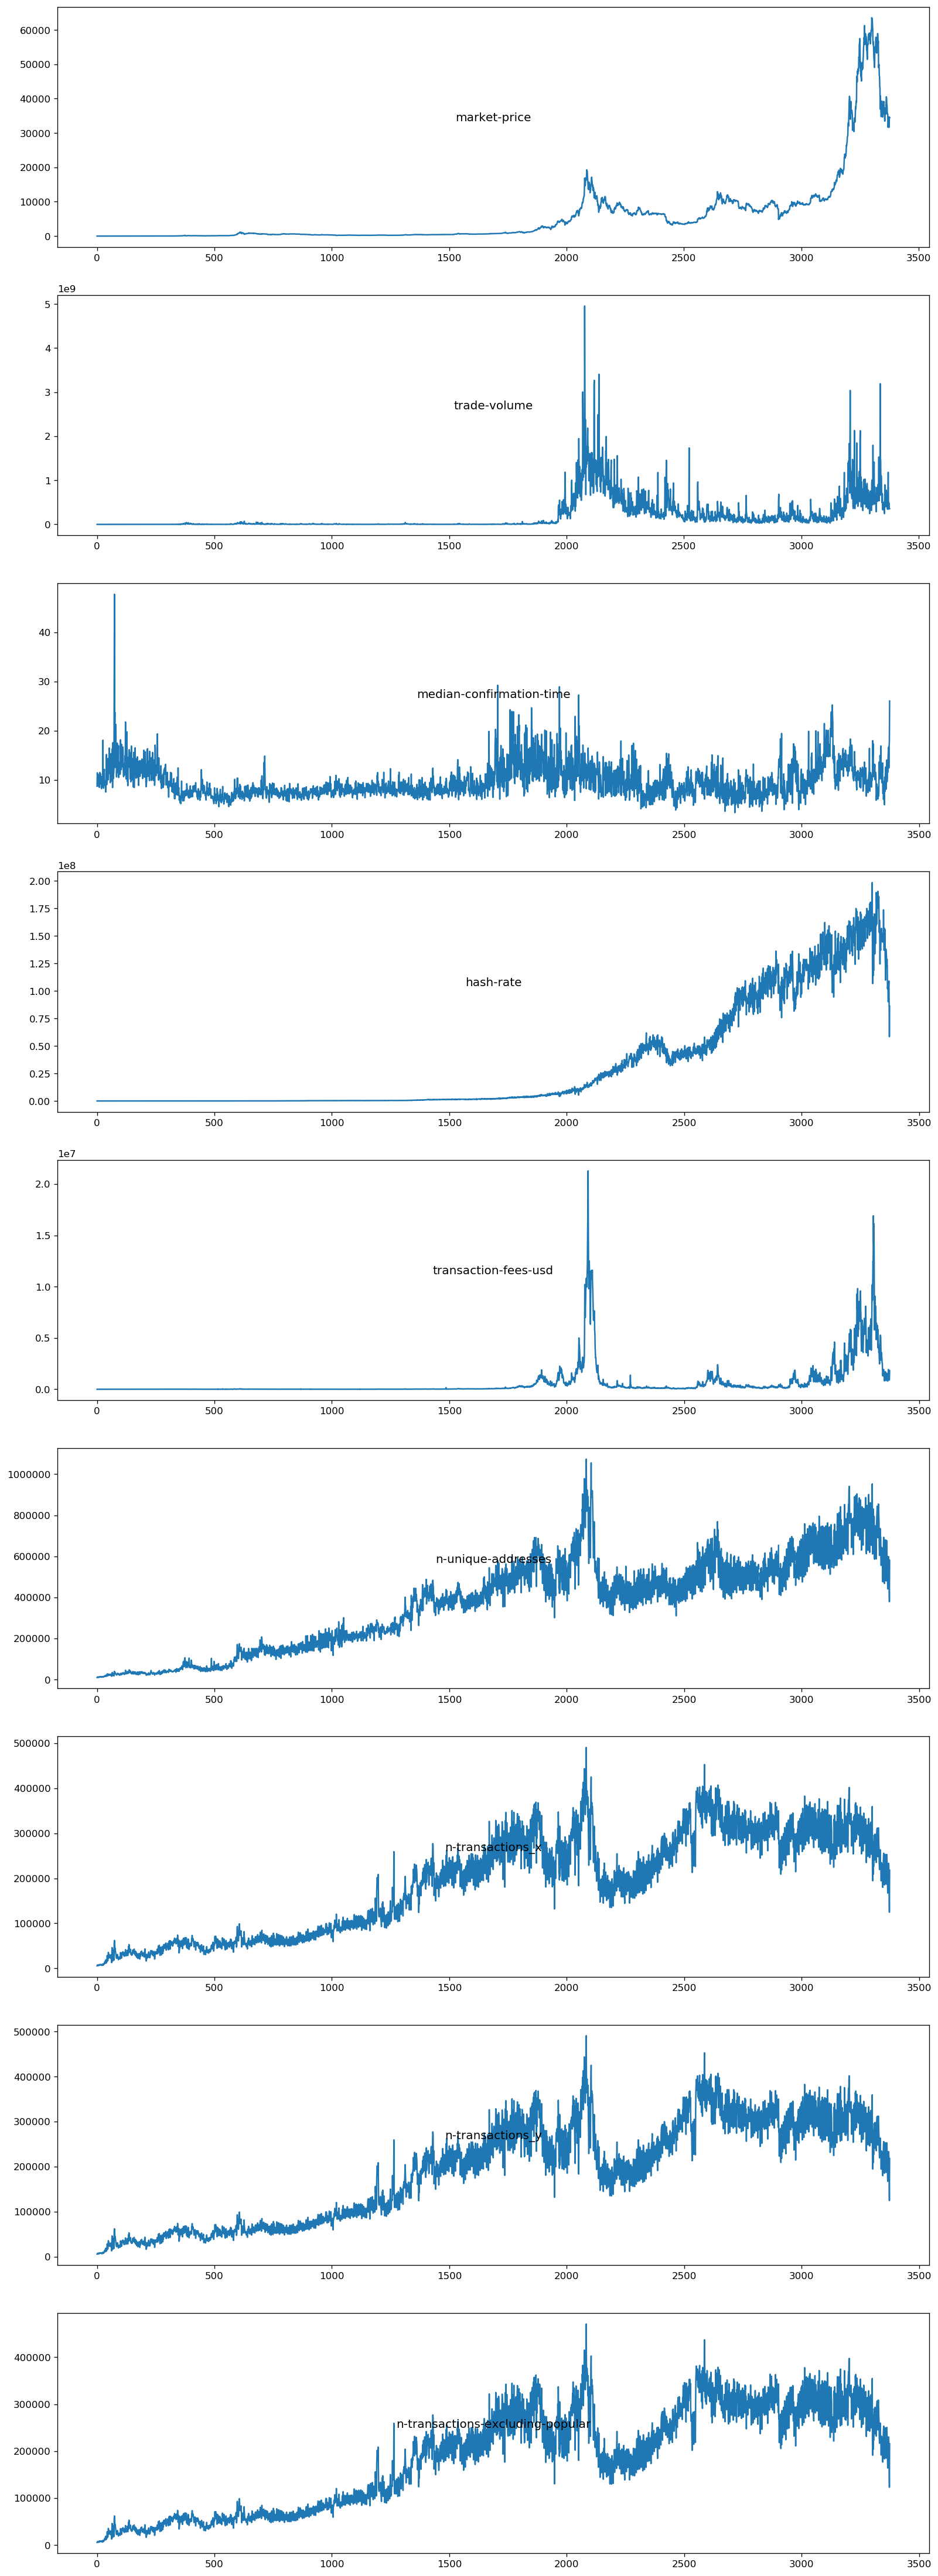

In [13]:
# PLOT GRAPHS OF ALL FEATURE DATA
from matplotlib import pyplot
dataset = totalled_df
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8]
i = 1
# plot each column
pyplot.figure(figsize=(16, 48), dpi=120)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='center')
    i += 1
pyplot.savefig('totalled_df.png')
pyplot.show()

## 3. Quant Perspective on Bitcoin leveraging ML
___   
**Quant Research**  
**Trading Bot**



### Bitcoin Resources

Exchanges

Learn Bitcoin    
[Bitcoin Wiki](https://en.bitcoin.it/wiki/Main_Page)  
[Bitcoin Knowledge Podcast](https://www.bitcoin.kn/)   
[We Use Coins: Individuals, Storage, Merchants, Exchanges](https://www.weusecoins.com/)    
[Bitcoin Mining](https://www.bitcoinmining.com/)    
[IamSitoshi](http://www.iamsatoshi.com/category/video-archive/)

Bitcoin Culture     
[Evolution of Bitcoin](https://www.youtube.com/watch?v=HUpGHOLkoXs)  
[Magic Money](https://www.youtube.com/watch?v=PVo5wCSnmSs)  
[Bitcoin: Beyond the Bubble](https://www.youtube.com/watch?v=LszOt51OjXU)  
[The Bitcoin Pheomenon](https://www.youtube.com/watch?v=6pWblf8COH4)  
[Ulterior States]

Books      
[Mastering Bitcoin](https://github.com/bitcoinbook/bitcoinbook)
[Reading List](https://github.com/jashmenn/bitcoin-reading-list)  
[Bitcoin Standard](https://www.amazon.com/Bitcoin-Standard-Decentralized-Alternative-Central/dp/1119473861)  
[Digital Gold](https://www.amazon.com/s?k=digital+gold&i=stripbooks&crid=UYMYEGA2LTWK&sprefix=digital+gold%2Cstripbooks%2C219&ref=nb_sb_ss_i_1_12)  
[Programming Bitcoin](https://www.amazon.com/Programming-Bitcoin-Learn-Program-Scratch-ebook/dp/B07NM32WGH/ref=sr_1_1?crid=2KFNUDGWWAU9Y&dchild=1&keywords=programming+bitcoin&qid=1588117310&s=books&sprefix=programming+bitcoin%2Cstripbooks%2C173&sr=1-1)  


Binance Research (These are really well done)   
[Portfolio Optimization w/BnB](https://research.binance.com/analysis/bnb-portfolio-optimization)  
[MultiAsset Portfolios: CryptoAsset Diversification Benefits](https://research.binance.com/analysis/bitcoin-diversification-benefits)  
[Categorizing CryptoAssets: Return-Driven Cluster Analysis](https://research.binance.com/analysis/cluster-analysis)  
[CryptoAsset Cycles](https://research.binance.com/analysis/cryptoasset-cycles)  
[Arb and Carry Trades](https://research.binance.com/analysis/defi-arbitrage-strategies)  
[Bitcoin Mining Allocation Strategy](https://research.binance.com/analysis/bitcoin-mining-allocation)   
[Institutional Money FLow 1](https://research.binance.com/analysis/institutional-insights-q2-2019)  
[Institutional Money Flow 2](https://research.binance.com/analysis/institutional-insights-2nd-edition)  
[Token Economies: Utility, Security, and Proprietary Tokens](https://research.binance.com/analysis/tokenization)  
[Evolution of Stablecoins](https://research.binance.com/analysis/stablecoins-evolution)  
[Ethereum (ETH)](https://research.binance.com/projects/ethereum)
[EOS (EOS)](https://research.binance.com/projects/eos)
[Ethereum Classic (ETC)](https://research.binance.com/projects/ethereum-classic)
[Cardano (ADA)](https://research.binance.com/projects/cardano)
[Monero (XMR)](https://research.binance.com/projects/monero)  
[Bitcoin Cash (BCH)](https://research.binance.com/projects/bitcoin-cash)
[Tezos (XTZ)](https://research.binance.com/projects/tezos)  


Binance Academy Articles

[Blockchain Use Cases](https://www.binance.vision/blockchain/blockchain-use-cases)  
[Wyckoff Method](https://www.binance.vision/economics/the-wyckoff-method-explained)  
[The Psychology of Market Cycles](https://www.binance.vision/economics/the-psychology-of-market-cycles)  
[Smart Contracts](https://www.binance.vision/blockchain/what-are-smart-contracts)
[Remittance](https://www.binance.vision/blockchain/blockchain-use-cases-remittance)  
[Binance Margin Trading](https://www.binance.vision/tutorials/binance-margin-trading-guide)  
[Options Contracts](https://www.binance.vision/economics/what-are-options-contracts)
[Margin Trading](https://www.binance.vision/economics/what-is-margin-trading)  
[Social Engineering](https://www.binance.vision/security/what-is-social-engineering)
[Blockchain in HealthCare](https://www.binance.vision/blockchain/blockchain-use-cases-healthcare)  
[Quantitative Easing](https://www.binance.vision/economics/what-is-quantitative-easing)  
[Fractional Reserve](https://www.binance.vision/economics/what-is-fractional-reserve)  
[Game Theory and Crypto](https://www.binance.vision/economics/game-theory-and-cryptocurrencies)  
[Why Public Wifi is Insecure](https://www.binance.vision/security/why-public-wifi-is-insecure)
[History of Cryptography](https://www.binance.vision/security/history-of-cryptography)  
[2008 Financial Crisis](https://www.binance.vision/economics/the-2008-financial-crisis-explained)  
[Fiat Currency](https://www.binance.vision/economics/what-is-fiat-currency)  
[What is Ripple](https://www.binance.vision/economics/what-is-ripple)  
[Pros and COns of Blockchain](https://www.binance.vision/economics/what-is-ripple)  
[What is Coin Burn](https://www.binance.vision/economics/what-is-ripple)  
[Trust Wallet](https://www.binance.vision/security/what-is-trust-wallet)  
[Byzantine Fault Tolerance](https://www.binance.vision/blockchain/byzantine-fault-tolerance-explained)  
[Liquidity Explained](https://www.binance.vision/economics/liquidity-explained)  
[Quantum Computers and CryptoCurrencies](https://www.binance.vision/blockchain/quantum-computers-and-cryptocurrencies)  
[AI x Blockchain](https://www.binance.vision/blockchain/blockchain-and-artificial-intelligence-the-future-of-technology-explained)  
[Blockchain Scalability](https://www.binance.vision/blockchain/blockchain-scalability-sidechains-and-payment-channels)  
[Leveraged Tokens](https://www.binance.vision/economics/a-beginners-guide-to-leveraged-tokens)  
[Fibonacci Retracement](https://www.binance.vision/economics/a-guide-to-mastering-fibonacci-retracement)  
[Crypto Lending](https://www.binance.vision/tutorials/the-ultimate-guide-to-earning-crypto-with-binance-lending)  
[Perpetual Futures Contracts](https://www.binance.vision/economics/what-are-perpetual-futures-contracts)
[Trading Futures](https://www.binance.vision/tutorials/the-ultimate-guide-to-trading-on-binance-futures)  
[Forward and Future Contracts](https://www.binance.vision/economics/what-are-forward-and-futures-contracts)  
[Asset Allocation and Diversification](https://www.binance.vision/economics/asset-allocation-and-diversification-explained)  
[Guide To Blockchain Tech](https://www.binance.vision/blockchain/what-is-blockchain-technology-a-comprehensive-guide-for-beginners)  
[Stock To Flow Model](https://www.binance.vision/economics/bitcoin-and-the-stock-to-flow-model)  
[Intro to Ethereum](https://www.binance.vision/blockchain/what-is-ethereum)  
[Bitcoin as Store of Value](https://www.binance.vision/economics/is-bitcoin-a-store-of-value) 
[Intro to Bitcoin](https://www.binance.vision/blockchain/what-is-bitcoin)  
[Decentralized Autonmous Organizations](https://www.binance.vision/blockchain/decentralized-autonomous-organizations-daos-explained)  
[Beginner's Guide](https://www.binance.vision/economics/a-beginners-guide-to-security-tokens)   
[Learn AI](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A/videos)  
[MIT Math x Finance Course](https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/video-lectures/lecture-20-option-price-and-probability-duality/)  
